In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.datasets import make_hastie_10_2
from sklearn.metrics import confusion_matrix,accuracy_score,RocCurveDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt


import time
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv("employee_training_data.csv")
df.describe()

,department_0,department_1,department_2,department_3,department_4,department_5,department_6,department_7,department_8,department_9,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
count,9532.0,9532.00000,9532.000000,9532.0,9532.0,9532.000000,9532.0,9532.000000,9532.000000,9532.0,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000,9532.000000
mean,0.0,0.07522,0.595468,0.0,0.0,0.087285,0.0,0.160827,0.081200,0.0,0.025598,2.000105,3.269198,1.018464,6.550986,2.000315,0.214540,1.000315,0.500000
std,0.0,0.26376,0.490827,0.0,0.0,0.282267,0.0,0.367390,0.273157,0.0,0.157941,1.414547,0.583158,0.548818,1.381724,1.414102,0.410525,0.816689,0.500026
min,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.000000,3.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000
50%,0.0,0.00000,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.000000,3.000000,1.000000,7.000000,2.000000,0.000000,1.000000,0.500000
75%,0.0,0.00000,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,3.000000,4.000000,1.000000,8.000000,3.000000,0.000000,2.000000,1.000000
max,0.0,1.00000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,4.000000,5.000000,2.000000,11.000000,4.000000,1.000000,2.000000,1.000000


In [12]:
test_df = pd.read_csv("employee_test_data.csv")
test_df.describe()

,department_0,department_1,department_2,department_3,department_4,department_5,department_6,department_7,department_8,department_9,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
count,2862.0,2862.000000,2862.000000,2862.0,2862.0,2862.000000,2862.0,2862.000000,2862.000000,2862.0,2862.000000,2862.000000,2862.000000,2862.000000,2862.000000,2862.000000,2862.000000,2862.000000,2862.000000
mean,0.0,0.081062,0.603774,0.0,0.0,0.084906,0.0,0.153389,0.076869,0.0,0.035290,0.653621,3.272886,1.013277,6.557303,0.505265,0.211740,184.654418,0.304682
std,0.0,0.272978,0.489198,0.0,0.0,0.278790,0.0,0.360425,0.266431,0.0,0.184544,0.084861,0.576808,0.554444,1.423096,0.158407,0.408613,4.152556,0.460353
min,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.389767,2.000000,0.000000,2.000000,0.030807,0.000000,171.374060,0.000000
25%,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.595625,3.000000,1.000000,5.000000,0.385648,0.000000,181.452075,0.000000
50%,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.648807,3.000000,1.000000,7.000000,0.498226,0.000000,184.600420,0.000000
75%,0.0,0.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.710236,4.000000,1.000000,8.000000,0.619591,0.000000,187.750810,1.000000
max,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.994363,5.000000,2.000000,12.000000,1.000000,1.000000,200.861656,1.000000


In [13]:
X_train = df.loc[:,df.columns != 'left']
y_train = df['left']
X_test = test_df.loc[:,df.columns != 'left']
y_test = test_df['left']

In [14]:
grid = {
    # "n_neighbors": [5, 10, 20],
    "n_neighbors": [20],
    "algorithm": ['auto'],
    # "leaf_size": [10, 20, 30, 40, 50],
    "leaf_size": [10],
    # "p": [0.01, 0.1, 1, 2, 10, 100],
    "p": [0.01, 0.1],
}
gcv = GridSearchCV(KNeighborsClassifier(), grid)
gcv.fit(X_train,y_train)
print(cross_val_score(gcv,X_train,y_train,cv=5))
y_pred = gcv.predict(X_test)
print(f"accuracy : {accuracy_score(y_test,y_pred)}")



KeyboardInterrupt: 

In [ ]:
grid = {
    "gamma" : ["scale","auto"]
}

svc = GridSearchCV(SVC(),grid)
svc.fit(X_train,y_train)
print(cross_val_score(svc,X_train,y_train,cv=5))
y_pred = svc.predict(X_test)
print(f"accuracy : {accuracy_score(y_test,y_pred)}")



[0.79706345 0.78605139 0.79328437 0.79643232 0.77649528]
accuracy : 0.6953179594689028


72.1186306476593
2.8737425804138184
0.6858839972047519
0.684136967155835
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


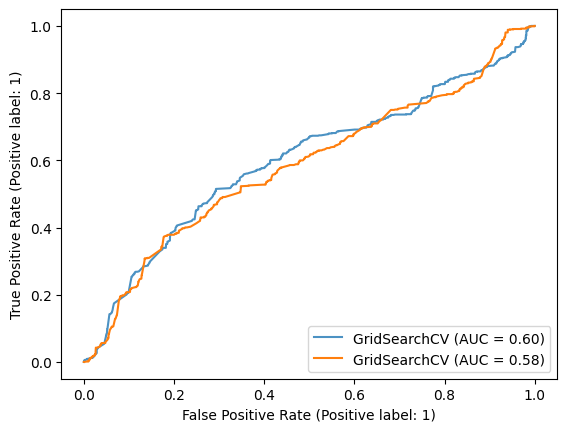

In [21]:
grid = {
    "n_estimators":[700],
    "learning_rate":[0.1,0.5],
    "max_depth" : [3,5],
    "n_iter_no_change" : [5],
    "tol" : [0.01],
}

grid2 = {
    "n_estimators":[700],
    "learning_rate":[0.1,0.5],
    "max_depth" : [3,5],
}



gcv_es = GridSearchCV(GradientBoostingClassifier(random_state=0),grid)
gcv = GridSearchCV(GradientBoostingClassifier(random_state=0),grid2)

start = time.time()
gcv.fit(X_train, y_train)
print(time.time() - start)

start = time.time()
gcv_es.fit(X_train, y_train)
print(time.time() - start)

print(gcv.score(X_test, y_test))
print(gcv_es.score(X_test, y_test))

# print(gcv.n_estimators_)
# print(gcv_es.n_estimators_)

print("-*" * 20)
# gcv.fit(X_train, y_train)
# print(cross_val_score(gcv,X_train,y_train,cv=5))
# print(gcv.best_params_)
# print(gcv.best_score_)
# y_pred = svc.predict(X_test)
# print(f"accuracy : {accuracy_score(y_test,y_pred)}")



ax = plt.gca()
gcv_disp = RocCurveDisplay.from_estimator(gcv, X_test, y_test, ax=ax, alpha=0.8,name="gcv")
gcv_es_disp = RocCurveDisplay.from_estimator(gcv_es,X_test,y_test,ax=ax,name="gcv_es")